In [1]:
from sklearn.datasets import fetch_20newsgroups
from nltk.stem import WordNetLemmatizer
from nltk.corpus import names
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report
from sklearn.svm import SVC

In [2]:
import pandas as pd
import numpy as np

In [3]:
from selenium import webdriver
from selenium.webdriver.common.desired_capabilities import DesiredCapabilities

In [4]:
from bs4 import BeautifulSoup

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

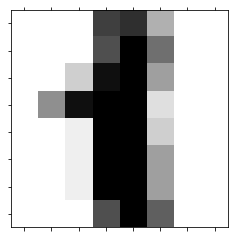

In [24]:
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
digits = datasets.load_digits()
def display_img(img_no):
    fig, ax = plt.subplots()
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.matshow(digits.images[img_no], cmap = plt.cm.binary);
display_img(1)

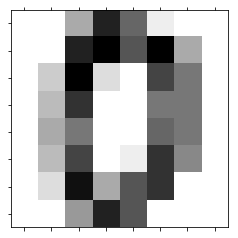

In [23]:
fig, ax = plt.subplots()
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.matshow(digits.images[0]* 20 + 20, cmap = plt.cm.binary)

In [25]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity

In [26]:
X = digits.data
co_sim = cosine_similarity(X[0].reshape(1,-1), X)

In [35]:
cosf = pd.DataFrame(co_sim).T
cosf.columns = ['similarity']
cosf.sort_values('similarity', ascending=False)

,similarity
0,1.000000
877,0.980739
464,0.974474
1365,0.974188
1541,0.971831
1167,0.971130
1029,0.970858
396,0.968793
1697,0.966019
646,0.965490


In [38]:
cosf['target'] = digits.target

In [42]:
l = cosf[cosf['target']==0]

In [43]:
from scipy import stats

In [45]:
stats.describe(l['similarity'])

DescribeResult(nobs=178, minmax=(0.70675369136712174, 1.0), mean=0.91918030807760054, variance=0.0016269974795365819, skewness=-1.811989137238429, kurtosis=5.472595681763089)

In [53]:
digits.target[0:10]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [55]:
for i in range(0,10):
    co_sim = cosine_similarity(X[i].reshape(1,-1), X)
    cosf = pd.DataFrame(co_sim).T
    cosf.columns = ['similarity']
    cosf['target'] = digits.target
    l = cosf[cosf['target']==i]
    print ("\n i = \n")
    print(i)
    print(stats.describe(l['similarity']))


 i = 

0
DescribeResult(nobs=178, minmax=(0.70675369136712174, 1.0), mean=0.91918030807760054, variance=0.0016269974795365819, skewness=-1.811989137238429, kurtosis=5.472595681763089)

 i = 

1
DescribeResult(nobs=182, minmax=(0.55403864286806526, 1.0000000000000002), mean=0.84597274134472666, variance=0.008365569883896808, skewness=-1.042394297278553, kurtosis=0.407372263100354)

 i = 

2
DescribeResult(nobs=177, minmax=(0.60345318863940511, 0.99999999999999978), mean=0.74345039400235458, variance=0.0046225927283742056, skewness=1.098125495606228, kurtosis=1.6237629295568023)

 i = 

3
DescribeResult(nobs=183, minmax=(0.56197511489453511, 0.99999999999999989), mean=0.83736271650756244, variance=0.0061957723346425598, skewness=-0.7998234938454981, kurtosis=0.4561997684864316)

 i = 

4
DescribeResult(nobs=181, minmax=(0.36722054435092699, 0.99999999999999978), mean=0.78404887998817152, variance=0.010921922926034357, skewness=-1.1157279961513182, kurtosis=1.913228616081681)

 i = 

5
D

In [58]:
for i in range(0,10):
    k_sim = chi2_kernel(X[i].reshape(1,-1), X)
    kf = pd.DataFrame(k_sim).T
    kf.columns = ['similarity']
    kf['target'] = digits.target
    l = kf[kf['target']==i]
    print ("\n i = \n")
    print(i)
    print(stats.describe(l['similarity']))


 i = 

0
DescribeResult(nobs=178, minmax=(2.749704873187822e-63, 1.0), mean=0.0056179792128143559, variance=0.0056179775090536652, skewness=13.228970092849028, kurtosis=173.00564971750075)

 i = 

1
DescribeResult(nobs=182, minmax=(9.8253252859260166e-110, 1.0), mean=0.0054945054971247513, variance=0.0054945054944765519, skewness=13.379294632449, kurtosis=177.00552486187848)

 i = 

2
DescribeResult(nobs=177, minmax=(5.1575456713734347e-101, 1.0), mean=0.0056497175141243016, variance=0.0056497175141242938, skewness=13.191121325277152, kurtosis=172.0056818181818)

 i = 

3
DescribeResult(nobs=183, minmax=(1.5319090529416059e-91, 1.0), mean=0.0054644812258121071, variance=0.0054644808704543786, skewness=13.416612631565844, kurtosis=178.00549450549298)

 i = 

4
DescribeResult(nobs=181, minmax=(3.6777683520959176e-136, 1.0), mean=0.0055248618784533516, variance=0.0055248618784530376, skewness=13.341872265748737, kurtosis=176.0055555555554)

 i = 

5
DescribeResult(nobs=182, minmax=(2.932

In [66]:
    k_sim = chi2_kernel(X[9].reshape(1,-1), X)
    kf = pd.DataFrame(k_sim).T
    kf.columns = ['similarity']
    kf['target'] = digits.target
    print(kf.sort_values('similarity', ascending=False)[:100])
    l = kf[kf['target']==9]
    print ("\n i = \n")
    print(kf)
    print(stats.describe(l['similarity']))

        similarity  target
9     1.000000e+00       9
251   2.339532e-25       9
199   7.275085e-27       9
1058  6.499471e-31       9
5     6.472692e-33       5
1186  1.929261e-33       9
1096  2.081918e-34       9
220   5.560005e-35       9
1146  2.405246e-35       9
1795  2.002653e-35       9
1686  1.969946e-35       9
423   1.115186e-35       9
1276  9.006833e-36       9
849   5.959759e-36       9
1226  3.997041e-36       9
459   1.152352e-37       9
1060  3.821413e-38       9
1038  3.448551e-38       9
149   1.772263e-38       9
233   4.480303e-39       9
1066  1.383135e-40       9
491   3.382474e-41       9
74    1.551094e-41       5
1324  1.425056e-41       9
159   3.367134e-42       9
203   2.745877e-42       9
1119  2.222855e-42       9
1740  1.265025e-42       9
478   1.104923e-42       9
254   9.875210e-43       9
...            ...     ...
1504  5.785924e-50       3
1787  3.897429e-50       5
555   3.144978e-50       9
748   2.793577e-50       5
120   2.627166e-50       5
1

In [56]:
from sklearn.metrics.pairwise import chi2_kernel
k_sim = chi2_kernel(X[0].reshape(1,-1), X)
kf = pd.DataFrame(k_sim).T
kf.columns = ['similarity']
kf.sort_values('similarity', ascending=False)

,similarity
0,1.000000e+00
1167,1.644255e-07
877,1.040593e-07
464,1.232666e-08
1541,8.598399e-09
1365,8.274881e-09
1029,1.907361e-09
855,1.487874e-10
1697,1.191874e-10
957,1.870301e-11


In [83]:
import pandas as pd
import numpy as np
from sklearn import cross_validation
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn import metrics

ModuleNotFoundError: No module named 'nolearn'

In [74]:
X = digits.data
y = digits.target
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X,y,test_size=0.1,random_state=50)

In [90]:
clf_rf = RandomForestClassifier()
clf_rf.fit(X_train, y_train)
y_pred_rf = clf_rf.predict(X_test)
acc_rf = accuracy_score(y_test, y_pred_rf)
print ("random forest accuracy: ",acc_rf)
print("Confusion matrix:\n%s" % metrics.confusion_matrix(y_test,  y_pred_rf))

random forest accuracy:  0.955555555556
Confusion matrix:
[[22  0  0  0  0  0  0  0  0  0]
 [ 0 15  1  0  0  0  0  0  0  0]
 [ 0  0 22  0  0  0  0  0  0  0]
 [ 0  0  1 14  0  0  0  0  1  0]
 [ 0  0  0  0 17  0  0  0  0  0]
 [ 0  0  0  0  0 15  0  0  0  0]
 [ 0  0  0  0  0  0 17  0  0  0]
 [ 0  0  0  0  0  0  0 15  0  0]
 [ 0  1  1  0  0  0  0  1 13  0]
 [ 0  1  1  0  0  0  0  0  0 22]]


In [111]:
for i in range(0,10):
    print(i , ":" , len(y_test[y_test==i]),len(y_pred_rf[y_pred_rf==i]),len(y_pred_rf[y_pred_rf==i])/len(y_test[y_test==i]))

0 : 22 22 1.0
1 : 16 17 1.0625
2 : 22 26 1.1818181818181819
3 : 16 14 0.875
4 : 17 17 1.0
5 : 15 15 1.0
6 : 17 17 1.0
7 : 15 16 1.0666666666666667
8 : 16 14 0.875
9 : 24 22 0.9166666666666666


In [89]:
clf_sgd = SGDClassifier()
clf_sgd.fit(X_train, y_train)
y_pred_sgd = clf_sgd.predict(X_test)
acc_sgd = accuracy_score(y_test, y_pred_sgd)
print ("stochastic gradient descent accuracy: ",acc_sgd)
print("Confusion matrix:\n%s" % metrics.confusion_matrix(y_test, y_pred_sgd))

stochastic gradient descent accuracy:  0.944444444444
Confusion matrix:
[[22  0  0  0  0  0  0  0  0  0]
 [ 0 15  0  0  0  0  0  0  1  0]
 [ 0  0 22  0  0  0  0  0  0  0]
 [ 0  0  0 12  0  1  0  0  3  0]
 [ 0  0  0  0 15  1  1  0  0  0]
 [ 0  0  0  0  0 15  0  0  0  0]
 [ 0  0  0  0  0  0 17  0  0  0]
 [ 0  0  0  0  0  0  0 14  0  1]
 [ 0  0  0  0  0  0  1  0 15  0]
 [ 0  0  0  0  0  0  0  0  1 23]]


In [112]:
for i in range(0,10):
    print(i , ":" , len(y_test[y_test==i]),len(y_pred_sgd[y_pred_sgd==i]),len(y_pred_sgd[y_pred_sgd==i])/len(y_test[y_test==i]))

0 : 22 22 1.0
1 : 16 15 0.9375
2 : 22 22 1.0
3 : 16 12 0.75
4 : 17 15 0.8823529411764706
5 : 15 17 1.1333333333333333
6 : 17 19 1.1176470588235294
7 : 15 14 0.9333333333333333
8 : 16 20 1.25
9 : 24 24 1.0


In [126]:
clf_knn = KNeighborsClassifier()
clf_knn.fit(X_train, y_train)
y_pred_knn = clf_knn.predict(X_test)
acc_knn = accuracy_score(y_test, y_pred_knn)
print ("nearest neighbors accuracy: ",acc_knn)
print("Confusion matrix:\n%s" % metrics.confusion_matrix(y_test, y_pred_knn))

nearest neighbors accuracy:  0.972222222222
Confusion matrix:
[[22  0  0  0  0  0  0  0  0  0]
 [ 0 16  0  0  0  0  0  0  0  0]
 [ 0  0 22  0  0  0  0  0  0  0]
 [ 0  0  0 14  0  0  0  1  0  1]
 [ 0  0  0  0 17  0  0  0  0  0]
 [ 0  0  0  0  0 15  0  0  0  0]
 [ 0  0  0  0  0  0 17  0  0  0]
 [ 0  0  0  0  0  0  0 14  0  1]
 [ 0  0  0  0  0  0  0  0 16  0]
 [ 0  0  0  1  0  0  0  0  1 22]]


In [110]:
for i in range(0,10):
    print(i , ":" , len(y_test[y_test==i]),len(y_pred_knn[y_pred_knn==i]),len(y_pred_knn[y_pred_knn==i])/len(y_test[y_test==i]))

0 : 22 22 1.0
1 : 16 16 1.0
2 : 22 22 1.0
3 : 16 15 0.9375
4 : 17 17 1.0
5 : 15 15 1.0
6 : 17 17 1.0
7 : 15 15 1.0
8 : 16 17 1.0625
9 : 24 24 1.0


In [114]:
from sklearn.grid_search import GridSearchCV

C:\Users\Milad\Anaconda3\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [121]:
k_range = list(range(1, 31))
knn = KNeighborsClassifier(n_neighbors=1)
param_grid = dict(n_neighbors=k_range)
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', n_jobs=-1)

In [122]:
grid.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [123]:
print(grid.best_score_)
print(grid.best_params_)


0.9876314162028448
{'n_neighbors': 1}


In [127]:
clf_knn = KNeighborsClassifier(n_neighbors=1)
clf_knn.fit(X_train, y_train)
y_pred_knn = clf_knn.predict(X_test)
acc_knn = accuracy_score(y_test, y_pred_knn)
print ("nearest neighbors accuracy: ",acc_knn)
print("Confusion matrix:\n%s" % metrics.confusion_matrix(y_test, y_pred_knn))

nearest neighbors accuracy:  0.983333333333
Confusion matrix:
[[22  0  0  0  0  0  0  0  0  0]
 [ 0 16  0  0  0  0  0  0  0  0]
 [ 0  0 22  0  0  0  0  0  0  0]
 [ 0  0  0 16  0  0  0  0  0  0]
 [ 0  0  0  0 17  0  0  0  0  0]
 [ 0  0  0  0  0 15  0  0  0  0]
 [ 0  0  0  0  0  0 17  0  0  0]
 [ 0  0  0  0  0  0  0 14  0  1]
 [ 0  0  0  0  0  0  0  0 16  0]
 [ 0  0  0  1  0  0  0  0  1 22]]


In [86]:
clf_svm = LinearSVC()
clf_svm.fit(X_train,y_train)
y_pred_svm=clf_svm.predict(X_test)
acc_svm = accuracy_score(y_test,y_pred_svm)
print("Svm accuracy" , acc_svm)
print("Confusion matrix:\n%s" % metrics.confusion_matrix(y_test, y_pred_svm))

Svm accuracy 0.938888888889
Confusion matrix:
[[22  0  0  0  0  0  0  0  0  0]
 [ 0 14  0  0  0  0  0  0  2  0]
 [ 0  0 21  0  0  0  0  0  1  0]
 [ 0  0  0 12  0  0  0  0  4  0]
 [ 0  1  0  0 16  0  0  0  0  0]
 [ 0  0  0  0  0 14  0  0  0  1]
 [ 0  0  0  0  0  0 17  0  0  0]
 [ 0  0  0  0  0  1  0 14  0  0]
 [ 0  0  0  0  0  0  0  0 16  0]
 [ 0  0  0  0  0  0  0  0  1 23]]


In [113]:
for i in range(0,10):
    print(i , ":" , len(y_test[y_test==i]),len(y_pred_svm[y_pred_svm==i]),len(y_pred_svm[y_pred_svm==i])/len(y_test[y_test==i]))

0 : 22 22 1.0
1 : 16 15 0.9375
2 : 22 21 0.9545454545454546
3 : 16 12 0.75
4 : 17 16 0.9411764705882353
5 : 15 15 1.0
6 : 17 17 1.0
7 : 15 14 0.9333333333333333
8 : 16 24 1.5
9 : 24 24 1.0
